In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker


In [2]:
file_path = "../Resources.2/general_dataset.csv"
df= pd.read_csv(file_path)
df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,AFG,Afghanistan,1971,NaN,NaN,1893554,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,2.665129,11475450,0.652
1,AFG,Afghanistan,1972,NaN,NaN,1530347,NaN,0.0,0.0,150.0,...,0.0,0.0,0.000000,0.0,0.0,2120.261216,150.0,2.714539,11791222,-1.089
2,AFG,Afghanistan,1976,NaN,NaN,1980859,NaN,0.0,0.0,51.0,...,0.0,0.0,0.000000,0.0,0.0,618.094723,51.0,1.981389,12943093,-0.295
3,AFG,Afghanistan,1978,NaN,NaN,2153300,NaN,0.0,0.0,120.0,...,0.0,0.0,0.393939,52000.0,52000.0,1979.191965,120.0,1.281715,13341199,0.105
4,AFG,Afghanistan,1980,NaN,NaN,1756302,NaN,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,224.601333,0.0,-0.407658,13356500,0.690


In [3]:
dma_df= df[(df['country_name'] == 'Dominica')]
dma_df.head()

,country_code,country_name,year,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
1315,DMA,Dominica,1970,NaN,NaN,25648,NaN,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,1.231455,71084,0.139
1316,DMA,Dominica,1979,61293846.85,22.566193,32976,17.958770,0.0,0.0,0.0,...,81.155614,0.0,20.288903,44650.0,44650.0,93333.333333,40.0,0.911290,74960,0.192
1317,DMA,Dominica,1980,60030298.62,21.460290,36640,16.709874,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.476451,75318,0.376
1318,DMA,Dominica,1984,77790098.40,18.270272,43968,6.177909,0.0,0.0,0.0,...,1.832222,0.0,0.458056,2000.0,2000.0,13513.513514,2.0,-0.860249,73846,-0.061
1319,DMA,Dominica,1989,80844330.59,15.490839,58624,8.407412,0.0,0.0,0.0,...,10.802797,0.0,2.700699,20000.0,20000.0,1000.000000,0.0,-0.690465,70722,-0.144


In [4]:
dma_df= dma_df.drop(['country_name'], axis=1)
dma_df.columns.tolist()

['country_code',
 'year',
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages_as_a_share_of_gdp',
 'economic_damages',
 'economic_damages_thous

In [5]:
dma_df= dma_df[(dma_df['year'] >= 1988) & (dma_df['year'] <= 2020)]
dma_df.set_index('year',inplace = True)
dma_df.head(10)

,country_code,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,deaths_from_drought,deaths_from_extreme_temps,deaths_from_floods,deaths_from_storms,deaths_from_wildfires,...,economic_damages_from_storms_as_a_share_of_gdp,economic_damages_from_wildfires,economic_damages_as_a_share_of_gdp,economic_damages,economic_damages_thousands,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,,,,,,,,,,,,
1989,DMA,80844330.59,15.490839,58624,8.407412,0.0,0.0,0.0,0.0,0.0,...,10.802797,0.0,2.700699,20000.0,20000.0,1000.000000,0.0,-0.690465,70722,-0.144
1995,DMA,77119200.34,12.166592,80608,0.783934,0.0,0.0,0.0,2.0,0.0,...,71.032501,0.0,17.758125,195000.0,195000.0,0.000000,2.0,0.085825,71105,0.663
1999,DMA,75973717.23,12.137315,80608,2.536390,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,571.428571,0.0,-0.507104,69828,0.525
2004,DMA,65784315.15,11.197854,142896,3.792007,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.405726,70387,0.557
2007,DMA,61106426.03,10.446423,183200,1.525049,0.0,0.0,0.0,2.0,0.0,...,4.746376,0.0,1.186594,20000.0,20000.0,10563.380282,2.0,0.111649,70797,0.877
2011,DMA,69442664.34,12.501016,153888,1.685322,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,202.816901,0.0,0.049369,70912,0.633
2015,DMA,76003703.70,14.055576,175872,6.865465,0.0,0.0,0.0,30.0,0.0,...,89.287392,0.0,22.321848,482810.0,482810.0,39436.619718,30.0,0.118089,71175,0.982
2017,DMA,67253652.12,13.405151,161216,-3.073315,0.0,0.0,0.0,64.0,0.0,...,280.087777,0.0,70.021944,1456000.0,1456000.0,100412.676056,64.0,0.214335,71460,0.905


In [6]:
dma_df = dma_df.drop([
 'country_code',
 'deaths_from_drought',
 'deaths_from_extreme_temps',
 'deaths_from_floods',
 'deaths_from_storms',
 'deaths_from_wildfires',
 'people_affected_by_drought_per_100k',
 'people_affected_by_extreme_temperatures_per_100k',
 'people_affected_by_floods_per_100k',
 'people_affected_by_storms_per_100k',
 'people_affected_by_wildfires_per_100k',
 'economic_damages_from_drought',
 'economic_damages_from_drought_as_a_share_of_gdp',
 'economic_damages_from_extreme_temperatures',
 'economic_damages_from_extreme_temperatures_as_a_share_of_gdp',
 'economic_damages_from_floods',
 'economic_damages_from_floods_as_a_share_of_gdp',
 'economic_damages_from_storms',
 'economic_damages_from_storms_as_a_share_of_gdp',
 'economic_damages_from_wildfires',
 'economic_damages',
 'economic_damages_thousands',
], axis=1)
dma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1989 to 2017
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               8 non-null      float64
 1   agriculture_value_added_percentage_gdp          8 non-null      float64
 2   annual_co2_emissions_tons                       8 non-null      int64  
 3   inflation_inflation_gdp_deflation               8 non-null      float64
 4   economic_damages_as_a_share_of_gdp              8 non-null      float64
 5   people_affected_per_100k                        8 non-null      float64
 6   number_of_deaths                                8 non-null      float64
 7   population_population_growth_annual_percentage  8 non-null      float64
 8   population_population_total                     8 non-null      int64  
 9   temperature_change_temp_change_celsius   

In [7]:
dma_df.columns.tolist()

['agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

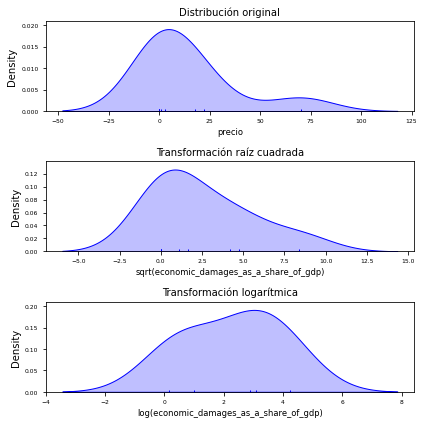

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    dma_df.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(dma_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(dma_df.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [9]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(dma_df.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.205695,1135.444673,-23.048100,inf,0.375000,0.161576
exponpow,0.249506,1137.213765,-21.503379,inf,0.374992,0.161594
beta,0.254574,1008.062194,-19.263065,inf,0.374992,0.161594
cauchy,0.257640,1420.487767,-23.326187,inf,0.386855,0.137917
lognorm,0.279539,1262.321349,-20.594112,inf,0.375000,0.161576
powerlaw,0.321609,900.423134,-19.472552,inf,0.422473,0.082590
chi2,0.358937,938.208310,-18.594078,inf,0.482800,0.030796
expon,0.365845,1026.761026,-20.521009,inf,0.452339,0.051603
logistic,0.414902,1054.174560,-19.514348,inf,0.295211,0.409617
norm,0.421730,975.527919,-19.383772,inf,0.319984,0.314785


Pairplot() function from the Seaborn library will output a figure containing histogram and scatter plot between each variable.

In [11]:
dma_df.corr ()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
agriculture_value_added_constants,1.000000,0.735523,-0.763873,0.545005,-0.092164,-0.222801,-0.149058,-0.686261,-0.096017,-0.550460
agriculture_value_added_percentage_gdp,0.735523,1.000000,-0.373765,0.490672,0.285833,0.266497,0.315101,-0.536247,0.305458,-0.476040
annual_co2_emissions_tons,-0.763873,-0.373765,1.000000,-0.298608,0.272179,0.450856,0.430098,0.742134,0.424594,0.793508
inflation_inflation_gdp_deflation,0.545005,0.490672,-0.298608,1.000000,-0.565499,-0.491611,-0.446700,-0.477210,-0.288023,-0.556175
economic_damages_as_a_share_of_gdp,-0.092164,0.285833,0.272179,-0.565499,1.000000,0.955465,0.960258,0.323630,0.697550,0.441914
people_affected_per_100k,-0.222801,0.266497,0.450856,-0.491611,0.955465,1.000000,0.993563,0.327500,0.638492,0.500112
number_of_deaths,-0.149058,0.315101,0.430098,-0.446700,0.960258,0.993563,1.000000,0.332677,0.655252,0.506224
population_population_growth_annual_percentage,-0.686261,-0.536247,0.742134,-0.477210,0.323630,0.327500,0.332677,1.000000,0.449442,0.744081
population_population_total,-0.096017,0.305458,0.424594,-0.288023,0.697550,0.638492,0.655252,0.449442,1.000000,0.410095
temperature_change_temp_change_celsius,-0.550460,-0.476040,0.793508,-0.556175,0.441914,0.500112,0.506224,0.744081,0.410095,1.000000


In [12]:
dma_corr_df = dma_df.corr(method='spearman')

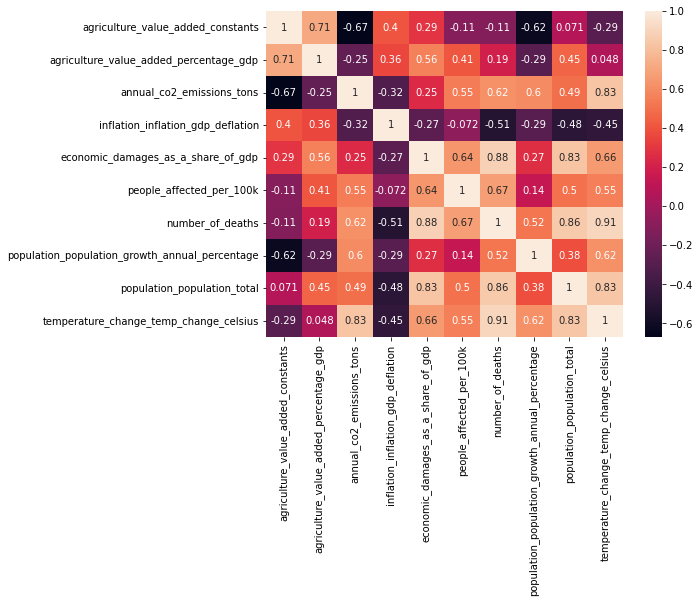

In [13]:
plt.figure(figsize=(8, 6))
sb.heatmap(dma_corr_df, annot=True)
plt.show()

### CORRELATION TESTS

El análisis gráfico hecho previamente y los test estadísticos mostraron evidencias de que no se puede asumir normalidad en las variables de desastres. Siendo estrictos, este hecho excluye la posibilidad de utilizar el coeficiente de Pearson, dejando como alternativas el de Spearman o Kendall. Sin embargo, dado que la distribución no se aleja mucho de la normalidad y de que el coeficiente de Pearson tiene cierta robustez, a fines prácticos sí que se podría utilizar siempre y cuando se tenga en cuenta este hecho y se comunique en los resultados. Otra posibilidad es tratar de transformar las variables para mejorar su distribución, por ejemplo, aplicando el logaritmo.

In [14]:
print('Correlación Pearson: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['population_population_total'], method='pearson'))
print('Correlación spearman: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['population_population_total'], method='spearman'))
print('Correlación kendall: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['population_population_total'], method='kendall'))

Correlación Pearson:  0.4100949356784588
Correlación spearman:  0.8333333333333335
Correlación kendall:  0.6428571428571428


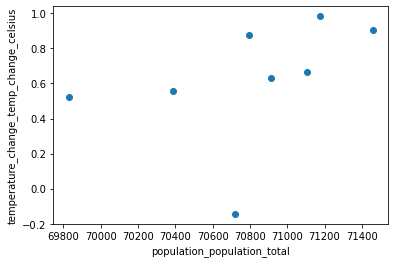

In [15]:
plt.scatter(dma_df.population_population_total , dma_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_total')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [16]:
print('Correlación Pearson: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['population_population_growth_annual_percentage'], method='pearson'))
print('Correlación spearman: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['population_population_growth_annual_percentage'], method='spearman'))
print('Correlación kendall: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['population_population_growth_annual_percentage'], method='kendall'))

Correlación Pearson:  0.7440813378874875
Correlación spearman:  0.6190476190476191
Correlación kendall:  0.5714285714285714


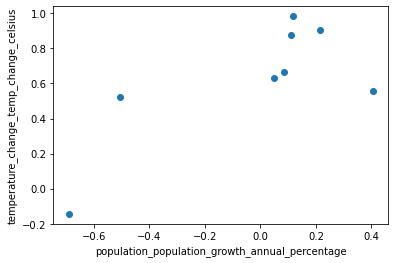

In [17]:
plt.scatter(dma_df.population_population_growth_annual_percentage, dma_df.temperature_change_temp_change_celsius )
plt.xlabel('population_population_growth_annual_percentage')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [18]:
print('Correlación Pearson: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['annual_co2_emissions_tons'], method='pearson'))
print('Correlación spearman: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['annual_co2_emissions_tons'], method='spearman'))
print('Correlación kendall: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['annual_co2_emissions_tons'], method='kendall'))

Correlación Pearson:  0.7935080464920801
Correlación spearman:  0.8263621207201486
Correlación kendall:  0.6910233190806424


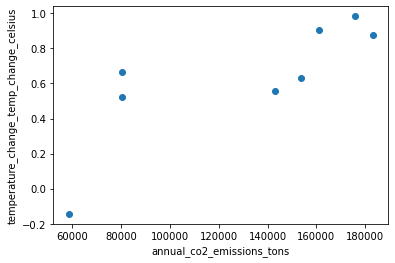

In [19]:
plt.scatter(dma_df.annual_co2_emissions_tons, dma_df.temperature_change_temp_change_celsius )
plt.xlabel('annual_co2_emissions_tons')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [20]:
print('Correlación Pearson: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.4419139697637337
Correlación spearman:  0.6587325492402599
Correlación kendall:  0.49135381491199537


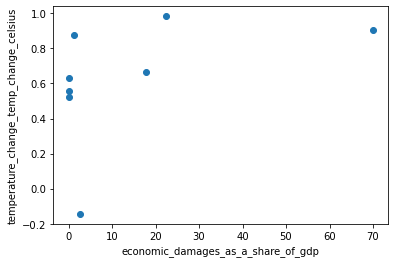

In [21]:
plt.scatter(dma_df.economic_damages_as_a_share_of_gdp, dma_df.temperature_change_temp_change_celsius )
plt.xlabel('economic_damages_as_a_share_of_gdp')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [22]:
# Correlación sin outlier
#r, p = stats.pearsonr(np.delete(a, 5), np.delete(b, 5))
#print(f"Correlación Pearson sin outlier: r={r}, p-value={p}")

In [23]:
print('Correlación Pearson: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['number_of_deaths'], method='pearson'))
print('Correlación spearman: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['number_of_deaths'], method='spearman'))
print('Correlación kendall: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['number_of_deaths'], method='kendall'))

Correlación Pearson:  0.5062236389729186
Correlación spearman:  0.9066867635238647
Correlación kendall:  0.7835467939002063


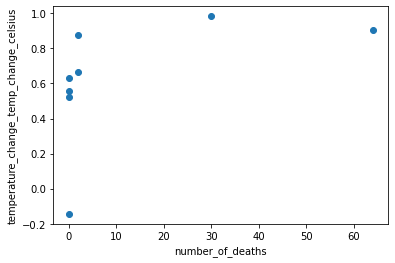

In [24]:
plt.scatter(dma_df.number_of_deaths, dma_df.temperature_change_temp_change_celsius )
plt.xlabel('number_of_deaths')
plt.ylabel('temperature_change_temp_change_celsius')
plt.show()

In [25]:
# Correlación sin outlier
#Pendiente


In [26]:
print('Correlación Pearson: ', dma_df['number_of_deaths'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', dma_df['number_of_deaths'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', dma_df['number_of_deaths'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.9602578127437041
Correlación spearman:  0.876735070338608
Correlación kendall:  0.8292279828967711


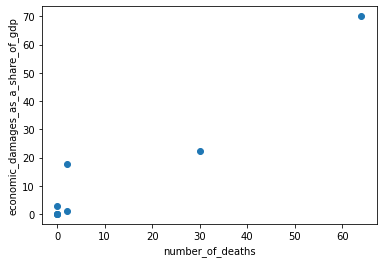

In [27]:
plt.scatter(dma_df.number_of_deaths, dma_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('number_of_deaths')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [28]:
# Correlación sin outlier
#Pendiente


In [29]:
print('Correlación Pearson: ', dma_df['people_affected_per_100k'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='pearson'))
print('Correlación spearman: ', dma_df['people_affected_per_100k'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='spearman'))
print('Correlación kendall: ', dma_df['people_affected_per_100k'].corr(dma_df['economic_damages_as_a_share_of_gdp'], method='kendall'))

Correlación Pearson:  0.9554653894490115
Correlación spearman:  0.6381449017759607
Correlación kendall:  0.5388602512436507


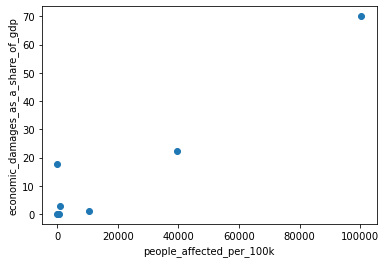

In [30]:
plt.scatter(dma_df.people_affected_per_100k, dma_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('people_affected_per_100k')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [31]:
# Correlación sin outlier
#Pendiente


In [32]:
print('Correlación Pearson: ', dma_df['economic_damages_as_a_share_of_gdp'].corr(dma_df['inflation_inflation_gdp_deflation'], method='pearson'))
print('Correlación spearman: ', dma_df['economic_damages_as_a_share_of_gdp'].corr(dma_df['inflation_inflation_gdp_deflation'], method='spearman'))
print('Correlación kendall: ', dma_df['economic_damages_as_a_share_of_gdp'].corr(dma_df['inflation_inflation_gdp_deflation'], method='kendall'))

Correlación Pearson:  -0.5654992505755387
Correlación spearman:  -0.26837252006084666
Correlación kendall:  -0.264575131106459


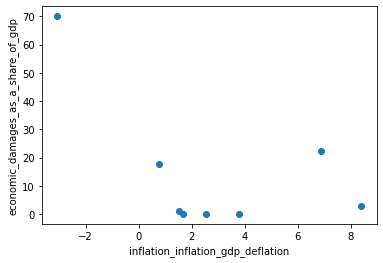

In [33]:
plt.scatter(dma_df.inflation_inflation_gdp_deflation, dma_df.economic_damages_as_a_share_of_gdp )
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('economic_damages_as_a_share_of_gdp')
plt.show()

In [34]:
print('Correlación Pearson: ', dma_df['inflation_inflation_gdp_deflation'].corr(dma_df['agriculture_value_added_constants'], method='pearson'))
print('Correlación spearman: ', dma_df['inflation_inflation_gdp_deflation'].corr(dma_df['agriculture_value_added_constants'], method='spearman'))
print('Correlación kendall: ', dma_df['inflation_inflation_gdp_deflation'].corr(dma_df['agriculture_value_added_constants'], method='kendall'))

Correlación Pearson:  0.5450045571103799
Correlación spearman:  0.4047619047619048
Correlación kendall:  0.3571428571428571


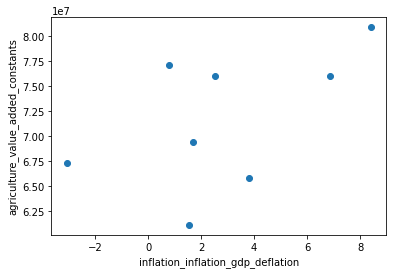

In [35]:
plt.scatter(dma_df.inflation_inflation_gdp_deflation, dma_df.agriculture_value_added_constants)
plt.xlabel('inflation_inflation_gdp_deflation')
plt.ylabel('agriculture_value_added_constants')
plt.show()

In [36]:
# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(dma_df['temperature_change_temp_change_celsius'], dma_df['population_population_total'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(dma_df['temperature_change_temp_change_celsius'], dma_df['population_population_total'], nan_policy='omit')
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(dma_df['temperature_change_temp_change_celsius'], dma_df['population_population_total'], nan_policy='omit')
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.4100949356784588, p-value=0.31293346469316285
Correlación Spearman: r=0.8333333333333335, p-value=0.01017554012345675
Correlación Pearson: r=0.6428571428571428, p-value=0.03115079365079365


## Normalizando una variable 

In [37]:
normalized_ND_2 = dma_df['number_of_deaths']/np.linalg.norm(dma_df['number_of_deaths'])
dma_df = dma_df.assign(normalized_ND_2=normalized_ND_2)
dma_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2
year,,,,,,,,,,,
1989,80844330.59,15.490839,58624,8.407412,2.700699,1000.000000,0.0,-0.690465,70722,-0.144,0.000000
1995,77119200.34,12.166592,80608,0.783934,17.758125,0.000000,2.0,0.085825,71105,0.663,0.028273
1999,75973717.23,12.137315,80608,2.536390,0.000000,571.428571,0.0,-0.507104,69828,0.525,0.000000
2004,65784315.15,11.197854,142896,3.792007,0.000000,0.000000,0.0,0.405726,70387,0.557,0.000000
2007,61106426.03,10.446423,183200,1.525049,1.186594,10563.380282,2.0,0.111649,70797,0.877,0.028273


In [38]:
print('Correlación Pearson: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['normalized_ND_2'], method='pearson'))
print('Correlación spearman: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['normalized_ND_2'], method='spearman'))
print('Correlación kendall: ', dma_df['temperature_change_temp_change_celsius'].corr(dma_df['normalized_ND_2'], method='kendall'))

Correlación Pearson:  0.5062236389729184
Correlación spearman:  0.9066867635238647
Correlación kendall:  0.7835467939002063


In [39]:
normalized_EDPGDP = dma_df['economic_damages_as_a_share_of_gdp']/np.linalg.norm(dma_df['economic_damages_as_a_share_of_gdp'])
dma_df = dma_df.assign(normalized_EDPGDP=normalized_EDPGDP)
dma_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1989,80844330.59,15.490839,58624,8.407412,2.700699,1000.000000,0.0,-0.690465,70722,-0.144,0.000000,0.035692
1995,77119200.34,12.166592,80608,0.783934,17.758125,0.000000,2.0,0.085825,71105,0.663,0.028273,0.234690
1999,75973717.23,12.137315,80608,2.536390,0.000000,571.428571,0.0,-0.507104,69828,0.525,0.000000,0.000000
2004,65784315.15,11.197854,142896,3.792007,0.000000,0.000000,0.0,0.405726,70387,0.557,0.000000,0.000000
2007,61106426.03,10.446423,183200,1.525049,1.186594,10563.380282,2.0,0.111649,70797,0.877,0.028273,0.015682


In [40]:
# Set independent and dependent variables
X = dma_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
y = dma_df['normalized_EDPGDP']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

y_pred = regr.predict(X)
print(y_pred.shape)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

(8,)
Intercept: -29.525276566087477
Coefficients: [ 4.20574672e-04  4.32238293e-01 -2.56458413e-06]


In [41]:
X = dma_df[['population_population_total','temperature_change_temp_change_celsius','annual_co2_emissions_tons']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(dma_df['normalized_EDPGDP'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:      normalized_EDPGDP   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     1.771
Date:                Sat, 27 Aug 2022   Prob (F-statistic):              0.292
Time:                        18:34:49   Log-Likelihood:                 1.6812
No. Observations:                   8   AIC:                             4.638
Df Residuals:                       4   BIC:                             4.955
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [42]:
print('R2 score:', olsmod.rsquared)

R2 score: 0.57048255305893


In [43]:
print('F-statistic:', olsmod.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod.f_pvalue)

F-statistic: 1.7709255106997643
Probability of observing value at least as high as F-statistic: 0.29150251427744756


Because our f_pvalue is lower than 0.05 we can conclude that our model performs better than other simpler model.

In [44]:
print(olsmod.pvalues)

const                                     0.141961
population_population_total               0.141662
temperature_change_temp_change_celsius    0.428429
annual_co2_emissions_tons                 0.514810
dtype: float64


All of our independent variables,  have p-value mayor than 0.05 which shows that there is not sufficient evidence that there variables affects our dependet variable.

In [45]:
# Set independent and dependent variables
X = dma_df[['normalized_EDPGDP']]
y = dma_df['inflation_inflation_gdp_deflation']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 4.011906088061449
Coefficients: [-6.35457077]


In [46]:
X = dma_df[['normalized_EDPGDP']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(dma_df['inflation_inflation_gdp_deflation'], X).fit()
print(olsmod.summary())

                                    OLS Regression Results                                   
Dep. Variable:     inflation_inflation_gdp_deflation   R-squared:                       0.320
Model:                                           OLS   Adj. R-squared:                  0.206
Method:                                Least Squares   F-statistic:                     2.821
Date:                               Sat, 27 Aug 2022   Prob (F-statistic):              0.144
Time:                                       18:34:49   Log-Likelihood:                -19.512
No. Observations:                                  8   AIC:                             43.02
Df Residuals:                                      6   BIC:                             43.18
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                        coef    std err          t      P>|t

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [47]:
print(olsmod.pvalues)

const                0.024035
normalized_EDPGDP    0.144053
dtype: float64


## Encoding

In [48]:
dma_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius,normalized_ND_2,normalized_EDPGDP
year,,,,,,,,,,,,
1989,80844330.59,15.490839,58624,8.407412,2.700699,1000.000000,0.0,-0.690465,70722,-0.144,0.000000,0.035692
1995,77119200.34,12.166592,80608,0.783934,17.758125,0.000000,2.0,0.085825,71105,0.663,0.028273,0.234690
1999,75973717.23,12.137315,80608,2.536390,0.000000,571.428571,0.0,-0.507104,69828,0.525,0.000000,0.000000
2004,65784315.15,11.197854,142896,3.792007,0.000000,0.000000,0.0,0.405726,70387,0.557,0.000000,0.000000
2007,61106426.03,10.446423,183200,1.525049,1.186594,10563.380282,2.0,0.111649,70797,0.877,0.028273,0.015682


In [49]:
dma_df = dma_df.drop(['normalized_ND_2','normalized_EDPGDP'],axis=1)
dma_df.head()

,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
year,,,,,,,,,,
1989,80844330.59,15.490839,58624,8.407412,2.700699,1000.000000,0.0,-0.690465,70722,-0.144
1995,77119200.34,12.166592,80608,0.783934,17.758125,0.000000,2.0,0.085825,71105,0.663
1999,75973717.23,12.137315,80608,2.536390,0.000000,571.428571,0.0,-0.507104,69828,0.525
2004,65784315.15,11.197854,142896,3.792007,0.000000,0.000000,0.0,0.405726,70387,0.557
2007,61106426.03,10.446423,183200,1.525049,1.186594,10563.380282,2.0,0.111649,70797,0.877


In [50]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(dma_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
 'agriculture_value_added_constants',
 'agriculture_value_added_percentage_gdp',
 'annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'economic_damages_as_a_share_of_gdp',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius',
])
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,agriculture_value_added_constants,agriculture_value_added_percentage_gdp,annual_co2_emissions_tons,inflation_inflation_gdp_deflation,economic_damages_as_a_share_of_gdp,people_affected_per_100k,number_of_deaths,population_population_growth_annual_percentage,population_population_total,temperature_change_temp_change_celsius
0,1.443087,1.872258,-1.557573,1.663088,-0.510029,-0.541710,-0.561810,-1.901680,-0.160606,-2.322034
1,0.855794,-0.338117,-1.075228,-0.604119,0.155000,-0.571766,-0.470086,0.321955,0.646109,0.115535
2,0.675200,-0.357584,-1.075228,-0.082942,-0.629308,-0.554591,-0.561810,-1.376455,-2.043642,-0.301298
3,-0.931231,-0.982255,0.291417,0.290476,-0.629308,-0.571766,-0.561810,1.238291,-0.866218,-0.204641
4,-1.668733,-1.481900,1.175716,-0.383713,-0.576901,-0.254273,-0.470086,0.395925,-0.002633,0.761929


In [51]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   agriculture_value_added_constants               8 non-null      float64
 1   agriculture_value_added_percentage_gdp          8 non-null      float64
 2   annual_co2_emissions_tons                       8 non-null      float64
 3   inflation_inflation_gdp_deflation               8 non-null      float64
 4   economic_damages_as_a_share_of_gdp              8 non-null      float64
 5   people_affected_per_100k                        8 non-null      float64
 6   number_of_deaths                                8 non-null      float64
 7   population_population_growth_annual_percentage  8 non-null      float64
 8   population_population_total                     8 non-null      float64
 9   temperature_change_temp_change_celsius         

### Dependent Variable

La variable "economic_damages_as_a_share_of_gdp" tiene una distribución asimétrica con una cola positiva. Este tipo de distribución suele visualizarse mejor tras aplicar el logarítmica o la raíz cuadrada.

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Us

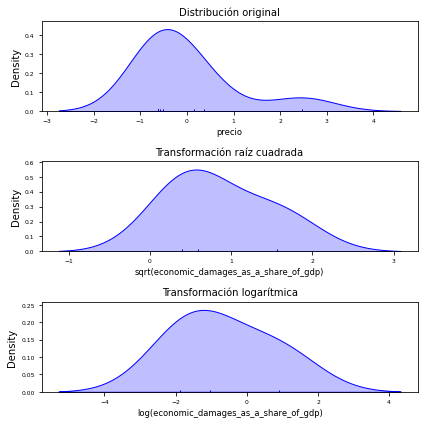

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sb.distplot(
    df_scaled.economic_damages_as_a_share_of_gdp,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sb.distplot(
    np.sqrt(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sb.distplot(
    np.log(df_scaled.economic_damages_as_a_share_of_gdp),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(economic_damages_as_a_share_of_gdp)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [53]:
from fitter import Fitter
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic', 'lognorm']

fitter = Fitter(df_scaled.economic_damages_as_a_share_of_gdp, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,103.345764,673.436016,26.707435,inf,0.373524,0.164719
cauchy,132.074768,796.515862,26.590296,inf,0.386969,0.137703
powerlaw,134.016059,346.680666,28.786469,inf,0.374982,0.161614
exponpow,134.488153,403.589091,28.814601,inf,0.374995,0.161586
beta,137.389657,446.356527,31.064803,inf,0.368826,0.175034
chi2,144.917765,370.891524,29.412124,inf,0.375000,0.161576
lognorm,152.833524,645.111260,29.837586,inf,0.374989,0.161599
expon,187.550442,402.801744,29.395733,inf,0.452339,0.051603
logistic,212.699534,430.215277,30.402395,inf,0.295211,0.409617
norm,216.199691,351.568636,30.532971,inf,0.319984,0.314785


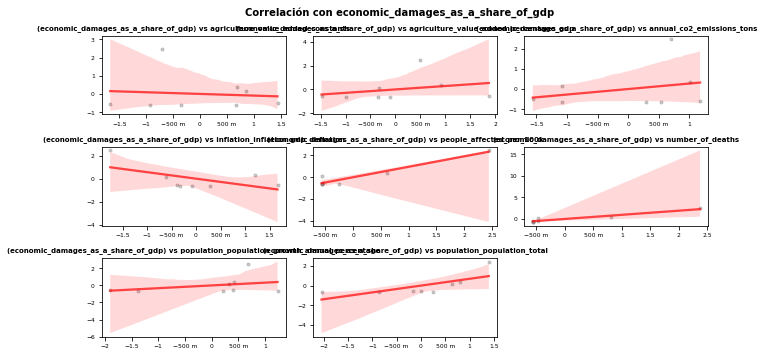

In [54]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_scaled.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('economic_damages_as_a_share_of_gdp')

for i, colum in enumerate(columnas_numeric):
    sb.regplot(
        x           = df_scaled[colum],
        y           = df_scaled['economic_damages_as_a_share_of_gdp'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"(economic_damages_as_a_share_of_gdp) vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con economic_damages_as_a_share_of_gdp', fontsize = 10, fontweight = "bold");

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### ROBUST MODELS

### linear regression on a dataset with outliers

(8, 1) (8,)


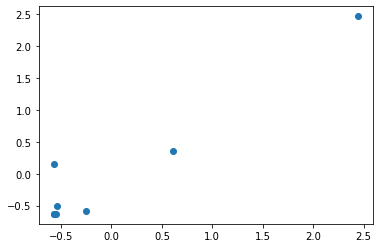

In [55]:
# linear regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# summarize shape
print(X.shape, y.shape)
# scatter plot of input vs output
pyplot.scatter(X, y)
pyplot.show()

Mean MAE: 0.332 (0.270)
The parameters of the line: [0.95546539]


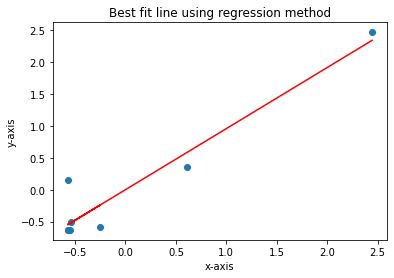

In [56]:
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)


# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = LinearRegression()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))


# Calculating the parameters using the least square method
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(f'The parameters of the line: {theta}')

# Now, calculating the y-axis values against x-values according to
# the parameters theta0 and theta1
y_line = X.dot(theta)
plt.scatter(X, y)
plt.plot(X, y_line, 'r')
plt.title('Best fit line using regression method')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

plt.show()

### Huber regression on a dataset with outliers - Robust model-
La regresión de Huber es un tipo de regresión robusta que es consciente de la posibilidad de valores atípicos en un conjunto de datos y les asigna menos peso que otros ejemplos en el conjunto de datos.

Podemos usar la regresión de Huber a través de la clase HuberRegressor en scikit-learn. El argumento " épsilon " controla lo que se considera un valor atípico, donde los valores más pequeños consideran más valores atípicos de los datos y, a su vez, hacen que el modelo sea más robusto para los valores atípicos. El valor predeterminado es 1,35.

In [57]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = HuberRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))




Mean MAE: 0.258 (0.245)


### Regresión RANSAC

Random Sample Consensus , o RANSAC para abreviar, es otro algoritmo de regresión robusto.

RANSAC intenta separar los datos en valores atípicos e internos y ajusta el modelo en los valores internos.

La biblioteca scikit-learn proporciona una implementación a través de la clase RANSACRegressor .

In [58]:
# ransac regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
evaluate_model(X, y, model).any()
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = RANSACRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
# plot the line of best fit


Mean MAE: 0.342 (0.348)


### Regresión de Theil Sen
La regresión de Theil Sen implica ajustar modelos de regresión múltiple en subconjuntos de los datos de entrenamiento y combinar los coeficientes al final.

El scikit-learn proporciona una implementación a través de la clase TheilSenRegressor .

In [59]:
# theilsen regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import TheilSenRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print(X.shape)
print(y.shape)

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# define the model
model = TheilSenRegressor()
# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))
#plot the line of best fit
#plot_best_fit(X, y_pred, model)

(8, 1)
(8,)
Mean MAE: 0.864 (0.991)


### Comparison

>Linear 0.332 (0.270)
>Huber 0.258 (0.245)
>RANSAC 0.314 (0.330)
>TheilSen 0.425 (0.432)


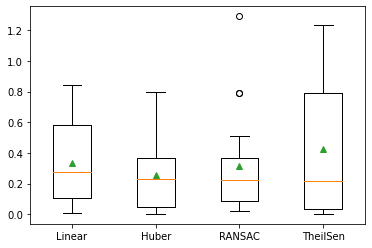

In [60]:

# compare robust regression algorithms on a regression dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
 
# dictionary of model names and model objects
def get_models():
    models = dict()
    models['Linear'] = LinearRegression()
    models['Huber'] = HuberRegressor()
    models['RANSAC'] = RANSACRegressor()
    models['TheilSen'] = TheilSenRegressor()
    return models
 
# evaluate a model
def evalute_model(X, y, model, name):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    return scores
 
# load the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']
# retrieve models
models = get_models()
results = dict()
for name, model in models.items():
	# evaluate the model
	results[name] = evalute_model(X, y, model, name)
	# summarize progress
	print('>%s %.3f (%.3f)' % (name, mean(results[name]), std(results[name])))
# plot model performance for comparison
pyplot.boxplot(results.values(), labels=results.keys(), showmeans=True)
pyplot.show()

(8, 1)


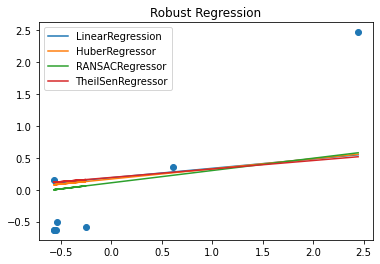

In [61]:
# plot line of best for multiple robust regression algorithms
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
 
# prepare the dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

print (X.shape)

# dictionary of model names and model objects
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(HuberRegressor())
	models.append(RANSACRegressor())
	models.append(TheilSenRegressor())
	return models
 
# plot the dataset and the model's line of best fit
def plot_best_fit(X, y, model):
	# fit the model on all data
	model.fit(X.values.reshape(-1, 1), y)
	# calculate outputs for grid across the domain
	y_pred = model.predict(X.values.reshape(-1, 1))
	# plot the line of best fit
	pyplot.plot(X, y_pred, label=type(model).__name__)
 
# load the dataset
X = df_scaled['people_affected_per_100k']
y = df_scaled['economic_damages_as_a_share_of_gdp']

# define a uniform grid across the input domain
xaxis = arange(X.min(), X.max(), 0.01)
for model in get_models():

# plot the line of best fit
	plot_best_fit(X, y_pred, model)
# plot the dataset
pyplot.scatter(X, y)
# show the plot
pyplot.title('Robust Regression')
pyplot.legend()
pyplot.show()




### Training and testing the linear regression model

In [62]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k','temperature_change_temp_change_celsius', 'number_of_deaths']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
#Entreno el modelo
model = regr.fit(X_train, y_train)

In [63]:
#Realizo una predicción
Y_pred_multiple = regr.predict(X_test)

In [64]:
print(Y_pred_multiple)
print(y_test)

[-0.75688237 -0.74624174]
1    0.155000
5   -0.629308
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [65]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[ 1.02101672 -0.11575786  0.06620789]
Valor de la intersección o coeficiente "b":
-0.12860198624840308


In [66]:
print('Precisión del modelo:')
print(regr.score(X_train, y_train))

Precisión del modelo:
0.9962209465243029


In [67]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.996
Model:                                            OLS   Adj. R-squared:                  0.991
Method:                                 Least Squares   F-statistic:                     175.7
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):            0.00566
Time:                                        18:34:54   Log-Likelihood:                 7.5349
No. Observations:                                   6   AIC:                            -7.070
Df Residuals:                                       2   BIC:                            -7.903
Df Model:                                           3                                         
Covariance Type:                            nonrobust                                         
                                             coef 

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\statsmodels\stats\stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [68]:
print(modelo.pvalues)

const                                     0.125435
people_affected_per_100k                  0.125798
temperature_change_temp_change_celsius    0.148379
number_of_deaths                          0.882765
dtype: float64


In [69]:
# Intervalos de confianza para los coeficientes del modelo
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-0.345540,0.088336
people_affected_per_100k,-0.704370,2.746403
temperature_change_temp_change_celsius,-0.332522,0.101006
number_of_deaths,-1.640144,1.772560


### Complete model without split

In [70]:
# Set independent and dependent variables
X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -4.283945467551197e-17
Coefficients: [-0.4151346  -0.07658878  0.8040116   0.09789271  0.15487789  0.16623579
  0.09366452]


## Model Validation

In [71]:
X = df_scaled[['annual_co2_emissions_tons',
 'inflation_inflation_gdp_deflation',
 'people_affected_per_100k',
 'number_of_deaths',
 'population_population_growth_annual_percentage',
 'population_population_total',
 'temperature_change_temp_change_celsius']]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       1.000
Model:                                            OLS   Adj. R-squared:                    nan
Method:                                 Least Squares   F-statistic:                       nan
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):                nan
Time:                                        18:34:54   Log-Likelihood:                 268.88
No. Observations:                                   8   AIC:                            -521.8
Df Residuals:                                       0   BIC:                            -521.1
Df Model:                                           7                                         
Covariance Type:                            nonrobust                                         
                                                  

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [72]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 1.0


In [73]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: nan
Probability of observing value at least as high as F-statistic: nan


In [74]:
print(olsmod_scaled.pvalues)

const                                            NaN
annual_co2_emissions_tons                        NaN
inflation_inflation_gdp_deflation                NaN
people_affected_per_100k                         NaN
number_of_deaths                                 NaN
population_population_growth_annual_percentage   NaN
population_population_total                      NaN
temperature_change_temp_change_celsius           NaN
dtype: float64


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Modelo OLS

In [75]:
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -3.022774311694999e-17
Coefficients: [0.95546539]


In [76]:
X = df_scaled[['people_affected_per_100k',]]
X = sm.add_constant(X) # adding a constant

olsmod_scaled = sm.OLS(df_scaled['economic_damages_as_a_share_of_gdp'], X).fit()
print(olsmod_scaled.summary())

                                    OLS Regression Results                                    
Dep. Variable:     economic_damages_as_a_share_of_gdp   R-squared:                       0.913
Model:                                            OLS   Adj. R-squared:                  0.898
Method:                                 Least Squares   F-statistic:                     62.90
Date:                                Sat, 27 Aug 2022   Prob (F-statistic):           0.000214
Time:                                        18:34:54   Log-Likelihood:                -1.5881
No. Observations:                                   8   AIC:                             7.176
Df Residuals:                                       6   BIC:                             7.335
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
                               coef    std err    

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [77]:
print('R2 score:', olsmod_scaled.rsquared)

R2 score: 0.9129141104349512


In [78]:
print('F-statistic:', olsmod_scaled.fvalue)
print('Probability of observing value at least as high as F-statistic:', olsmod_scaled.f_pvalue)

F-statistic: 62.89749912376214
Probability of observing value at least as high as F-statistic: 0.00021350742957448461


In [79]:
print(olsmod_scaled.pvalues)

const                       1.000000
people_affected_per_100k    0.000214
dtype: float64


In [80]:
df_scaled['residual'] = olsmod_scaled.resid

### Assumption Testing

#### Linearity:
This assumes that there is a linear relationship between the independent variables and the dependent variable. In our case since we have multiple independent variables, we can do this by using a scatter plot to see our predicted values versus the actual values.

In [81]:
df_scaled['predictions'] = olsmod.predict(X)

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


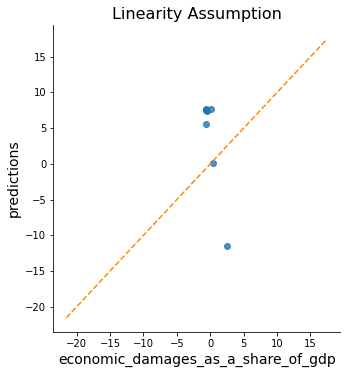

In [82]:
# Plotting the observed vs predicted values
sb.lmplot(x='economic_damages_as_a_share_of_gdp', y='predictions', data=df_scaled, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].min().min()-10, 
                        df_scaled[['economic_damages_as_a_share_of_gdp', 'predictions']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('predictions', fontsize=14)
plt.xlabel('economic_damages_as_a_share_of_gdp', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

The scatter plots show residual point dont spread around the diagonal line, so we can assume that there isnt linear relationship between our independent and dependent variables.

#### Normality:
This assumes that the error terms of the model are normally distributed. We will examine the normality of the residuals by plotting it into histogram and looking at the p-value from the Anderson-Darling test for normality. 

C:\Users\jqu23\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


p-value from the test Anderson-Darling test below 0.05 generally means non-normal: 0.05201830506262304


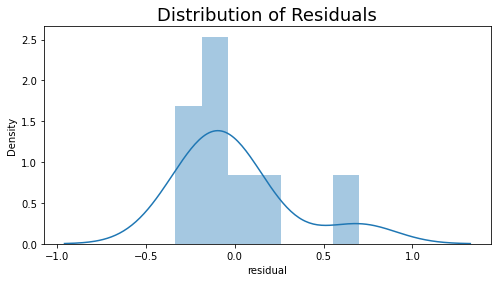

Residuals are normally distributed


In [83]:
from statsmodels.stats.diagnostic import normal_ad

# Performing the test on the residuals
p_value = normal_ad(df_scaled['residual'])[1]
print('p-value from the test Anderson-Darling test below 0.05 generally means non-normal:', p_value)

# Plotting the residuals distribution
plt.subplots(figsize=(8, 4))
plt.title('Distribution of Residuals', fontsize=18)
sb.distplot(df_scaled['residual'])
plt.show()

# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

#### Multicollinearity:
This assumes that the predictors used in the regression are not correlated with each other. To identify if there are any correlation between our predictors we can calculate the Pearson correlation coefficient between each column in our data

Pearson correlation coefficient matrix of each variables:
                                     people_affected_per_100k  \
people_affected_per_100k                            1.000000   
economic_damages_as_a_share_of_gdp                  0.955465   

                                    economic_damages_as_a_share_of_gdp  
people_affected_per_100k                                      0.955465  
economic_damages_as_a_share_of_gdp                            1.000000  


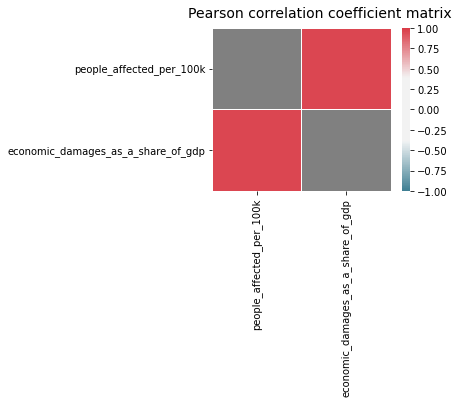

In [94]:
corr = df_scaled[['people_affected_per_100k','economic_damages_as_a_share_of_gdp']].corr()
print('Pearson correlation coefficient matrix of each variables:\n', corr)

# Generate a mask for the diagonal cell
mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, val=True)

# Initialize matplotlib figure
fig, ax = plt.subplots(figsize=(4, 3))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(220, 10, as_cmap=True, sep=100)
cmap.set_bad('grey')

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Pearson correlation coefficient matrix', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
# fig.tight_layout()

#### Autocorrelation
Autocorrelation is correlation of the errors (residuals) over time. Used when data are collected over time to detect if autocorrelation is present. Autocorrelation exists if residuals in one time period are related to residuals in another period. We can detect autocorrelation by performing Durbin-Watson test to determine if either positive or negative correlation is present. In this step we will use the durbin_watson () function from statsmodel to calculate our Durbin-Watson score and then assess the value with the following condition:

If the Durbin-Watson score is less than 1.5 then there is a positive autocorrelation and the assumption is not satisfied


If the Durbin-Watson score is between 1.5 and 2.5 then there is no autocorrelation and the assumption is satisfied


If the Durbin-Watson score is more than 2.5 then there is a negative autocorrelation and the assumption is not satisfied

In [85]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(df_scaled['residual'])

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbinWatson > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')

Durbin-Watson: 1.9981444587504031
Little to no autocorrelation 

Assumption satisfied


#### Homoscedasticity
This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms. To detect homoscedasticity, we can plot our residual and see if the variance appears to be uniform.

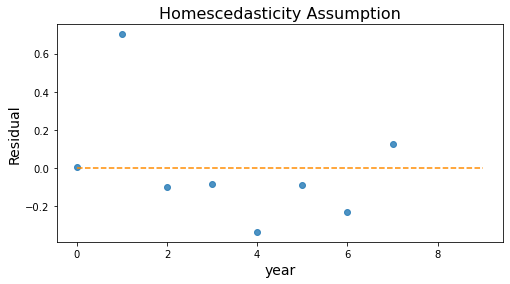

In [86]:
# Plotting the residuals
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_scaled.index, y=df_scaled.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_scaled.index)+2), color='darkorange', linestyle='--')

plt.ylabel('Residual', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.title('Homescedasticity Assumption', fontsize=16)
plt.show()  

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------

### Huber Model

In [88]:
# huber regression on a dataset with outliers
from random import random
from random import randint
from random import seed
from numpy import arange
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

# prepare the dataset
# Set independent and dependent variables
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

# evaluate a model
def evaluate_model(X, y, model):
    # define model evaluation method
    cv = RepeatedKFold(n_splits=6, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    return absolute(scores)
 
# load dataset
X = df_scaled[['people_affected_per_100k']]
y = df_scaled['economic_damages_as_a_share_of_gdp']

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# define the model
model = HuberRegressor()
#Entreno el modelo
model_hu = model.fit(X_train, y_train)

#Realizo una predicción
Y_pred = regr.predict(X_test)

# evaluate model
results = evaluate_model(X, y, model)
print('Mean MAE: %.3f (%.3f)' % (mean(results), std(results)))

Mean MAE: 0.258 (0.245)


In [89]:
print(Y_pred)
print(y_test)

[-0.51758537 -0.54047845]
0   -0.510029
5   -0.629308
Name: economic_damages_as_a_share_of_gdp, dtype: float64


In [90]:
print('Intercept:', model_hu.intercept_)
print('Coefficients:', model_hu.coef_)

Intercept: -0.09973556226173322
Coefficients: [1.01384089]


In [91]:
print('Precisión del modelo:')
print(model_hu.score(X_train, y_train))

Precisión del modelo:
0.8902420316116917
